# Introducción
El Festival de la Canción de Eurovisión es un concurso televisivo de carácter anual, en el que participan intérpretes representantes de los países cuyas televisiones (en su mayoría públicas) son miembros de la Unión Europea de Radiodifusión [1].  En este documento hemos tratado de analizar los datos de los paises y canciones que han participado desde el año 1998 hasta el año 2010 y hemos tratado de dar solución a diferentes dudas que se nos plantean sobre ellos. 

In [47]:
options(digits=4)
set.seed(100)
options(repr.plot.width=15, repr.plot.height=10)

#Hemos quitado los ' para evitar errores
#Hemos puesto . en los espacios de nombres de paises
# (y cambiar & por and en Serbia & Montenegro))
data <- read.table("data/Eurovision_data.txt", header=T, sep="\t")

#Filtramos la parte de las puntuaciones
puntuaciones<-data[,c(18:64)]

#Realizamos la media de las puntuaciones
MediasPuntuaciones<-aggregate(x = puntuaciones, by = list(data$Country), FUN = "mean", na.rm=TRUE)

#Obtenemos los nombres de los paises (1º columna, "Group1"), la quitamos, y lo ponemos como rownames
RowCountry<-as.vector(MediasPuntuaciones[,1])
TablaPuntuaciones<-as.matrix(MediasPuntuaciones[-1])
rownames(TablaPuntuaciones)<-RowCountry

#Obtenemos los paises que han puntuado y han sido puntuados: "paisesIncluidos"
paises1<-names(data)[18:64]
paises2<-unique(data[,2])
paises<-intersect(paises1,paises2)
paisesIncluidos<-sort(paises)

paisesNoIncluidos<-union(setdiff(paises1,paises2),setdiff(paises2,paises1))

#Ordenamos la tabla (filas, y columnas) en orden alfabético (paisesIncluidos esta ordenado ya)
#y sustituimos los NA por 0
TablaPuntuaciones<-TablaPuntuaciones[paisesIncluidos,]
TablaPuntuaciones<-TablaPuntuaciones[,paisesIncluidos]
TablaPuntuaciones[is.na(TablaPuntuaciones)] <- 0

# El dataset
Para analizar los datos usaremos un dataset [2] creado por Jens Finnäs y que tiene los datos de las canciones participantes en los años 1998-2010.
El dataset está hecho de manera que en cada fila tenemos la  información  de la canción con la que participó un país en un año. Las variables son las siguientes:

* [1] Year: El año en la que participó la canción.
* [2] Country: El país de la canción.
* [3] Region: A qué región pertenece el país: Former Socialist Bloc, Former Yugoslavia, Independent, Scandinavia, Western Europe.
* [4] Song.language: Idioma en el que fue cantada la canción.
* [5] English: 'Yes' si la canción fue cantada en Ingles, 'No' en los otros casos.
* [6] Artist: Nombre del artista.               
* [7] Song: Nombre de la canción.                
* [8] English.translation: Traducción al inglés del nombre de la canción.       
* [9] Artist.gender: 'Male' si el cantante era hombre, 'Female' si la cantante era mujer y 'Both' para los grupos mixtos.          
* [10] Group.Solo: 'Group' si cantó un grupo, 'Solo' si solo cantó un cantante.
* [11] Place: En qué posición del ranking quedó.                    
* [12] Points: Cuántos puntos obtuvo.                    
* [13] Host.Country: En qué pais se celebró Eurovisión ese año.       
* [14] Host.region: En qué región se celebró Eurovisión ese año.      
* [15] Home.Away.Country: 'Home' para el si ese año cantó en su pais. 'Away' en los demás casos.   
* [16] Home.Away.Region:  'Home' para el si ese año cantó en su región.'Away' en los demás casos.         
* [17] Approximate.Betting.Prices: ????
* [18..64] (Nombres de los paises): Puntos que obtuvo de dicho pais

# Preguntas que nos hacemos sobre el dataset
Con los datos anteriormente descritos nos surgen algunas preguntas acerca del concurso. En este apartado vamos a tratar de resolver algunas de nuestras dudas.

## ¿Cantar en inglés, o cantar en grupo influye en las puntuaciones?
Vemos que en el dataset tenemos información sobre cómo era la canción o quiénes la cantaron. ¿La canción era en inglés?¿El cantante era hombre o mujer?¿Cantaba solitario o en grupo?
Con esta información tenemos una duda evidente. ¿Todo esto influye para obtener más puntos?. Es decir, ¿si el próximo año mandamos a alguien que canta en inglés tendremos más probabilidad de ganar?¿es mejor que mandemos a un hombre o una mujer?
Empecemos observando las medias para los diferentes grupos. Primero realizaremos un preprocesado para obtener los datos que necesitamos:


In [48]:
#Obtenemos los vectores con los puntos y los valores de canción en ingles, sexo, solitario/grupo
english<-as.vector(data$English)
gender<-as.vector(data$Artist.gender )
group<-as.vector(data$Group.Solo)
points<-as.vector(data$Points)

#Filtramos solo en el que haya datos
valoresGrupo<-(group!="")
valoresSexo<-(gender!="")

A continuación observamos las medias:

In [49]:
#Observamos las medias
tapply(points , english,mean)
tapply(points[valoresGrupo], group[valoresGrupo],mean)
tapply(points[valoresSexo] , gender[valoresSexo],mean)

No   Yes 
69.43 84.18

Group  Solo 
83.75 99.31

Both Female   Male 
 64.29 100.08  98.32

En un principio podríamos concluir que es mejor que sea una cantante (mujer, en solitario) cantase una canción en inglés, ya que hemos obtenido medias más altas. Sin embargo no sabemos si las diferencias entre esas medias son significativas [3,4]. Para salir fuera de dudas aplicaremos un test anova, compararemos la varianza que hay dentro de los grupos con la que hay entre los grupos.


In [50]:
#Análisis de la varianza
summary(aov(points ~ english))

             Df  Sum Sq Mean Sq F value Pr(>F)  
english       1   16972   16972    3.81  0.052 .
Residuals   314 1399876    4458                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [51]:
summary(aov(points[valoresGrupo] ~ group[valoresGrupo]))

                     Df Sum Sq Mean Sq F value Pr(>F)
group[valoresGrupo]   1   9039    9039    1.66    0.2
Residuals           169 918977    5438               

In [52]:
summary(aov(points[valoresSexo] ~ gender[valoresSexo]))

                     Df Sum Sq Mean Sq F value Pr(>F)  
gender[valoresSexo]   2  25262   12631    2.35  0.098 .
Residuals           168 902754    5374                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Observamos los diferentes p valores (0.052,0.2 y 0.098). Los tres valores son mayores que 0.05 por lo tanto no podemos deducir que las canciones que sean en ingles, o cantadas por una mujer o en solitario obtengan más puntos. El que hayan obtenido mejor puntuación media podría haber sido casualidad.


## ¿Los países cercanos tienen los mismos gustos?

En el dataset tenemos los datos de los puntos que cada país ha dado cada al resto a lo largo de los diferentes años.


In [53]:
#Filtramos la parte de las puntuaciones
puntuaciones<-data[,c(18:64)]

#Realizamos la media de las puntuaciones
MediasPuntuaciones<-aggregate(x = puntuaciones, by = list(data$Country), FUN = "mean", na.rm=TRUE)

#Obtenemos los nombres de los paises (1º columna, "Group1"), la quitamos, y lo ponemos como rownames
RowCountry<-as.vector(MediasPuntuaciones[,1])
TablaPuntuaciones<-as.matrix(MediasPuntuaciones[-1])
rownames(TablaPuntuaciones)<-RowCountry

#Obtenemos los paises que han puntuado y han sido puntuados: "paisesIncluidos"
paises1<-names(data)[18:64]
paises2<-unique(data[,2])
paises<-intersect(paises1,paises2)
paisesIncluidos<-sort(paises)

#Ordenamos la tabla (filas, y columnas) en orden alfabético (paisesIncluidos esta ordenado ya)
#y sustituimos los NA por 0
TablaPuntuaciones<-TablaPuntuaciones[paisesIncluidos,]
TablaPuntuaciones<-TablaPuntuaciones[,paisesIncluidos]
TablaPuntuaciones[is.na(TablaPuntuaciones)] <- 0

Con esto obtenemos una tabla con las puntuaciones de los países. En cada fila la media de puntos que ha recibido de cada uno de los paises.
Con esta tabla podemos hacer un análisis de componentes principales (usando la tabla transpuesta ya que lo que deseamos es saber los puntos que ha dado a cada país, no cuántos ha recibido) y representamos el resultado en un plano en dos dimensiones.


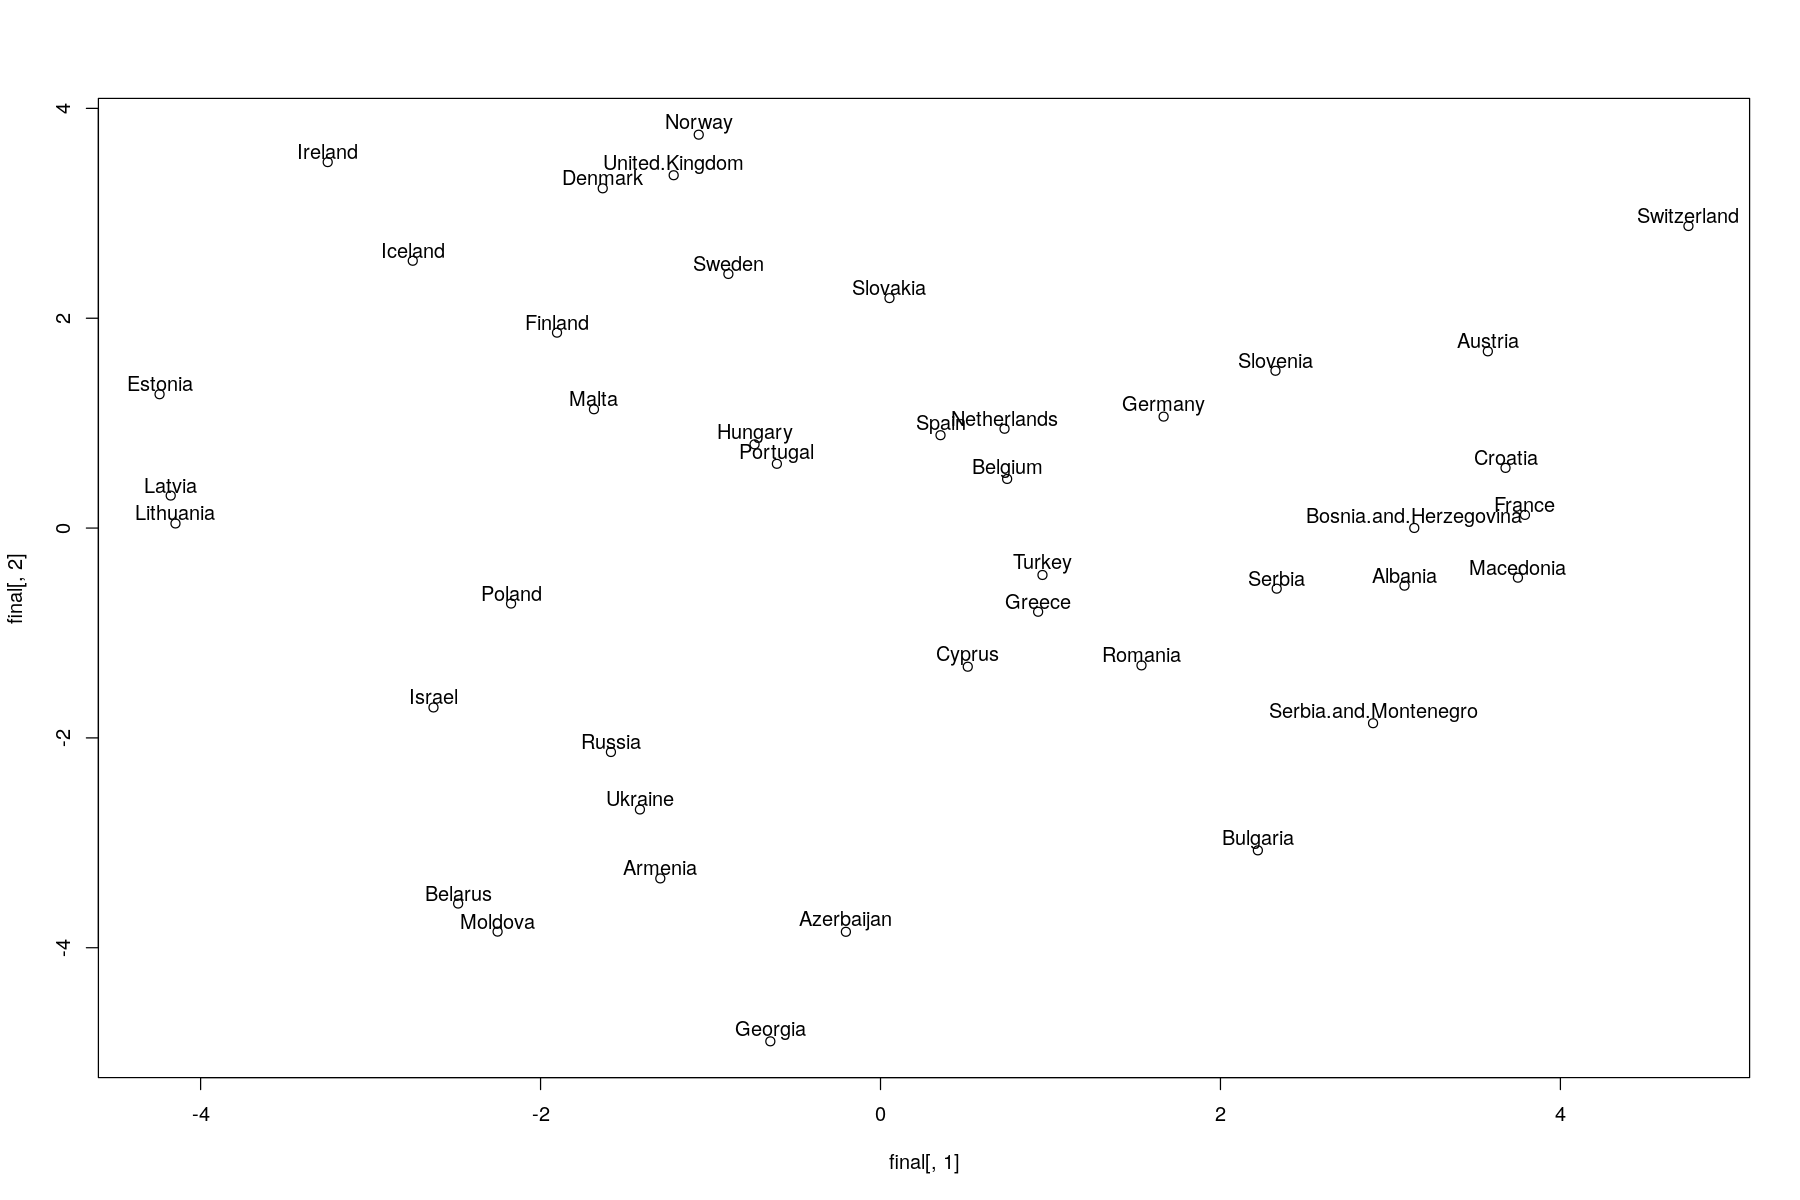

In [54]:
b<-prcomp(t(TablaPuntuaciones),scale.=T)

final <- b$x[,1:2]

plot(final[,1], final[,2])
text(final[,1], final[,2]+0.1, labels=paisesIncluidos)

Observando el plano podemos observar qué países tienen gustos similares. Observamos que hay algunos países como Lituania y Letonia, países geográficamente cercanos, tienen además gustos similares. Sin embargo en otros casos es al contrario como Hungaria y Portugal que aparecen cerca pese a ser dos países que están lejos el uno del otro.
Pese a que no observamos clusters sí que observamos que en general los países geográficamente (o culturalmente) cercanos tienen gustos similares. Lo podemos observar con los países Bálticos, los Balcanes, o lo países nórdicos.


## ¿Los países cercanos se votan entre sí?

He aquí la gran pregunta. Hay gente que piensa que en realidad en Eurovisión no votan la canción en sí, sino el país con el que tienen más afinidad. Pero ¿es esto verdad?. Vamos a verlo. 
Usaremos como similitud entre dos países la suma de los votos dados y recibidos. De esta manera, por ejemplo, si un país A diese una media de 4 puntos a un país B y este a su vez diese 6 puntos al país A la similitud entre ambos países sería 10.

In [55]:
A<-TablaPuntuaciones
B<-t(TablaPuntuaciones)
sim<-A+B

Esta tabla de similaridades la convertiremos en una tabla de distancias, realizaremos un multidimensional de Scaling y representaremos los resultados en un plano.

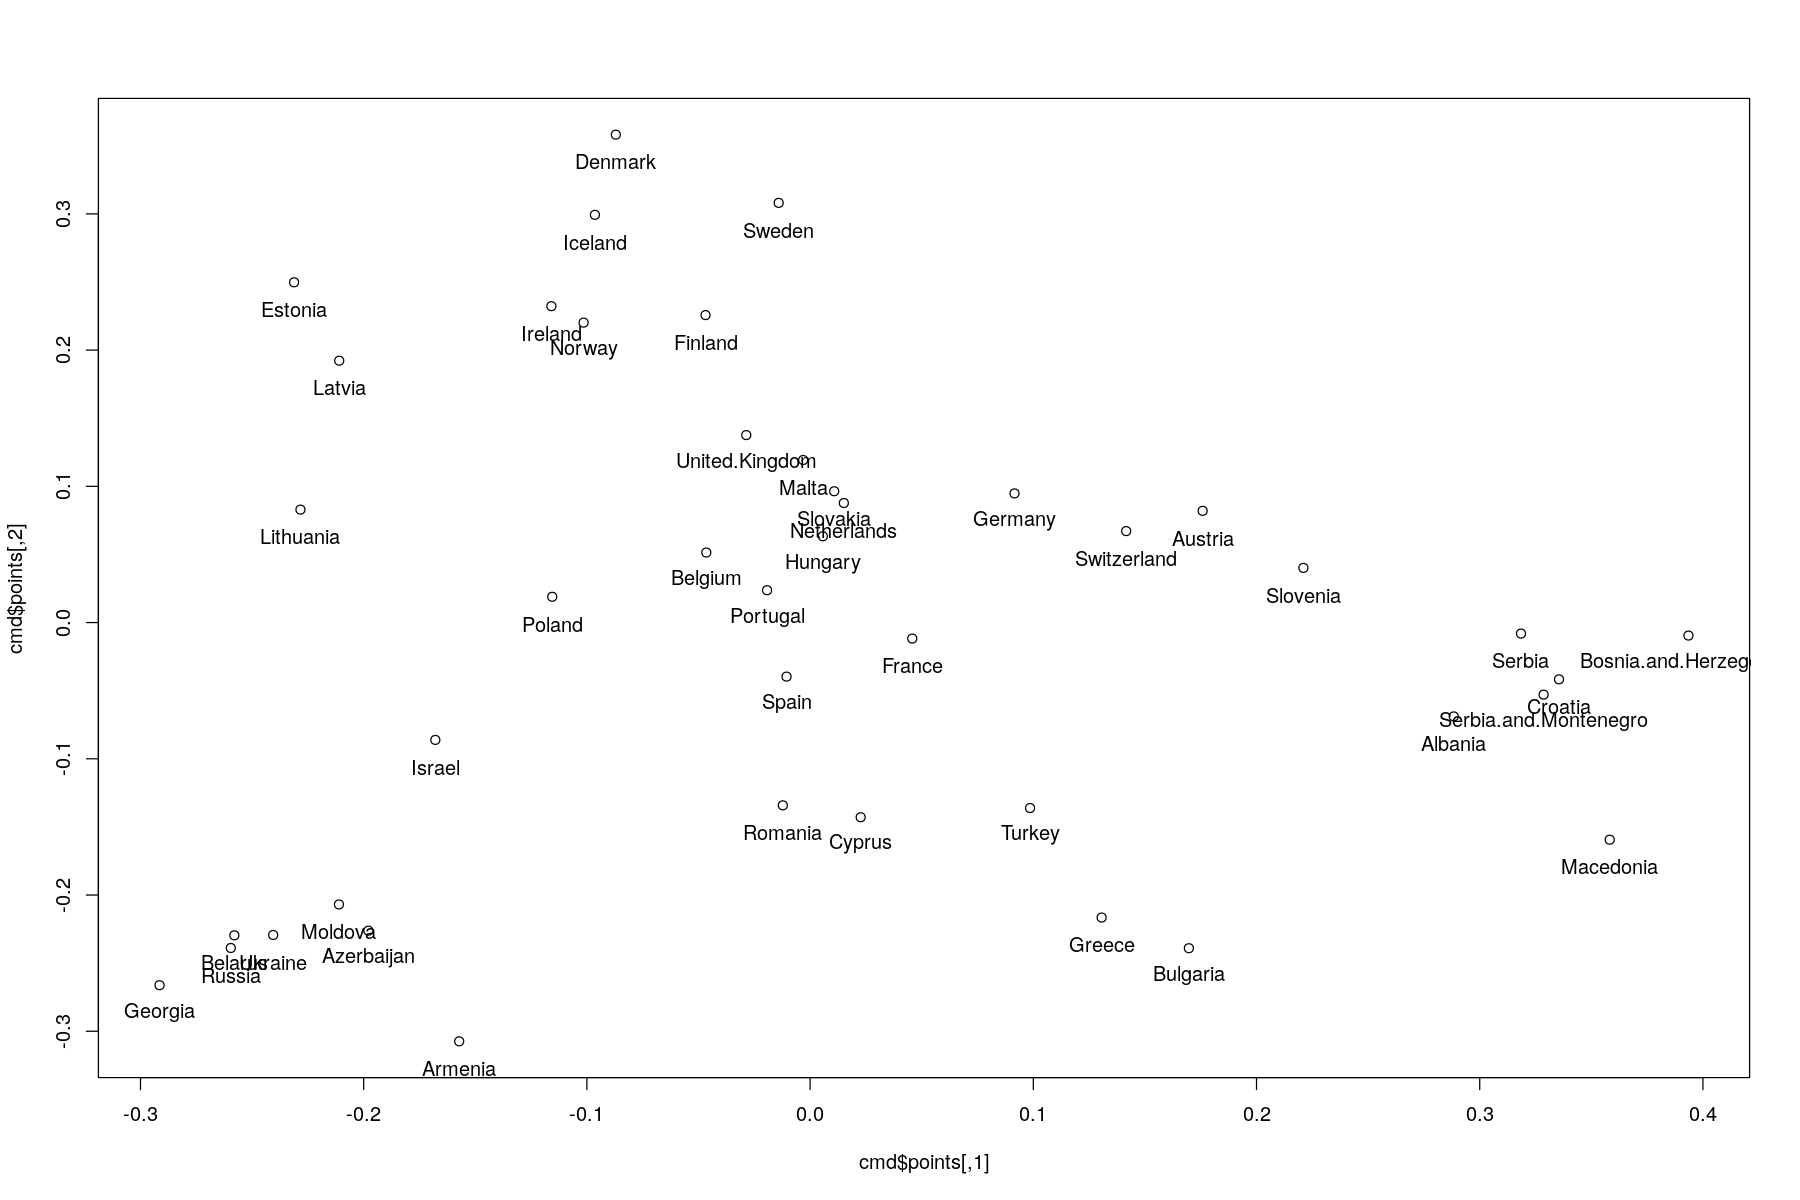

In [56]:
#Pasar a distancias
maximo<-max(sim)
numPaises<-length(paisesIncluidos)
ones <- matrix(rep(1, numPaises*numPaises), ncol=numPaises, byrow=TRUE)

dist<-sqrt(ones - (sim/maximo))

#Hacemos un MDS
cmd <- cmdscale(dist, eig=T, k = 2)

#Hacemos un plot
plot(cmd$points)
text(cmd$points[,1], cmd$points[,2]-0.02, labels=paisesIncluidos)

En este caso se ve bastante claro que en general los países están agrupados de forma parecida a como lo están geográficamente.
Vamos a ir más a allá y vamos a buscar clusters. Usaremos 5 clusters (apoyándonos en la idea de que el dataset utiliza 5 regiónes Former Socialist Bloc, Former Yugoslavia, Independent, Scandinavia, Western Europe).

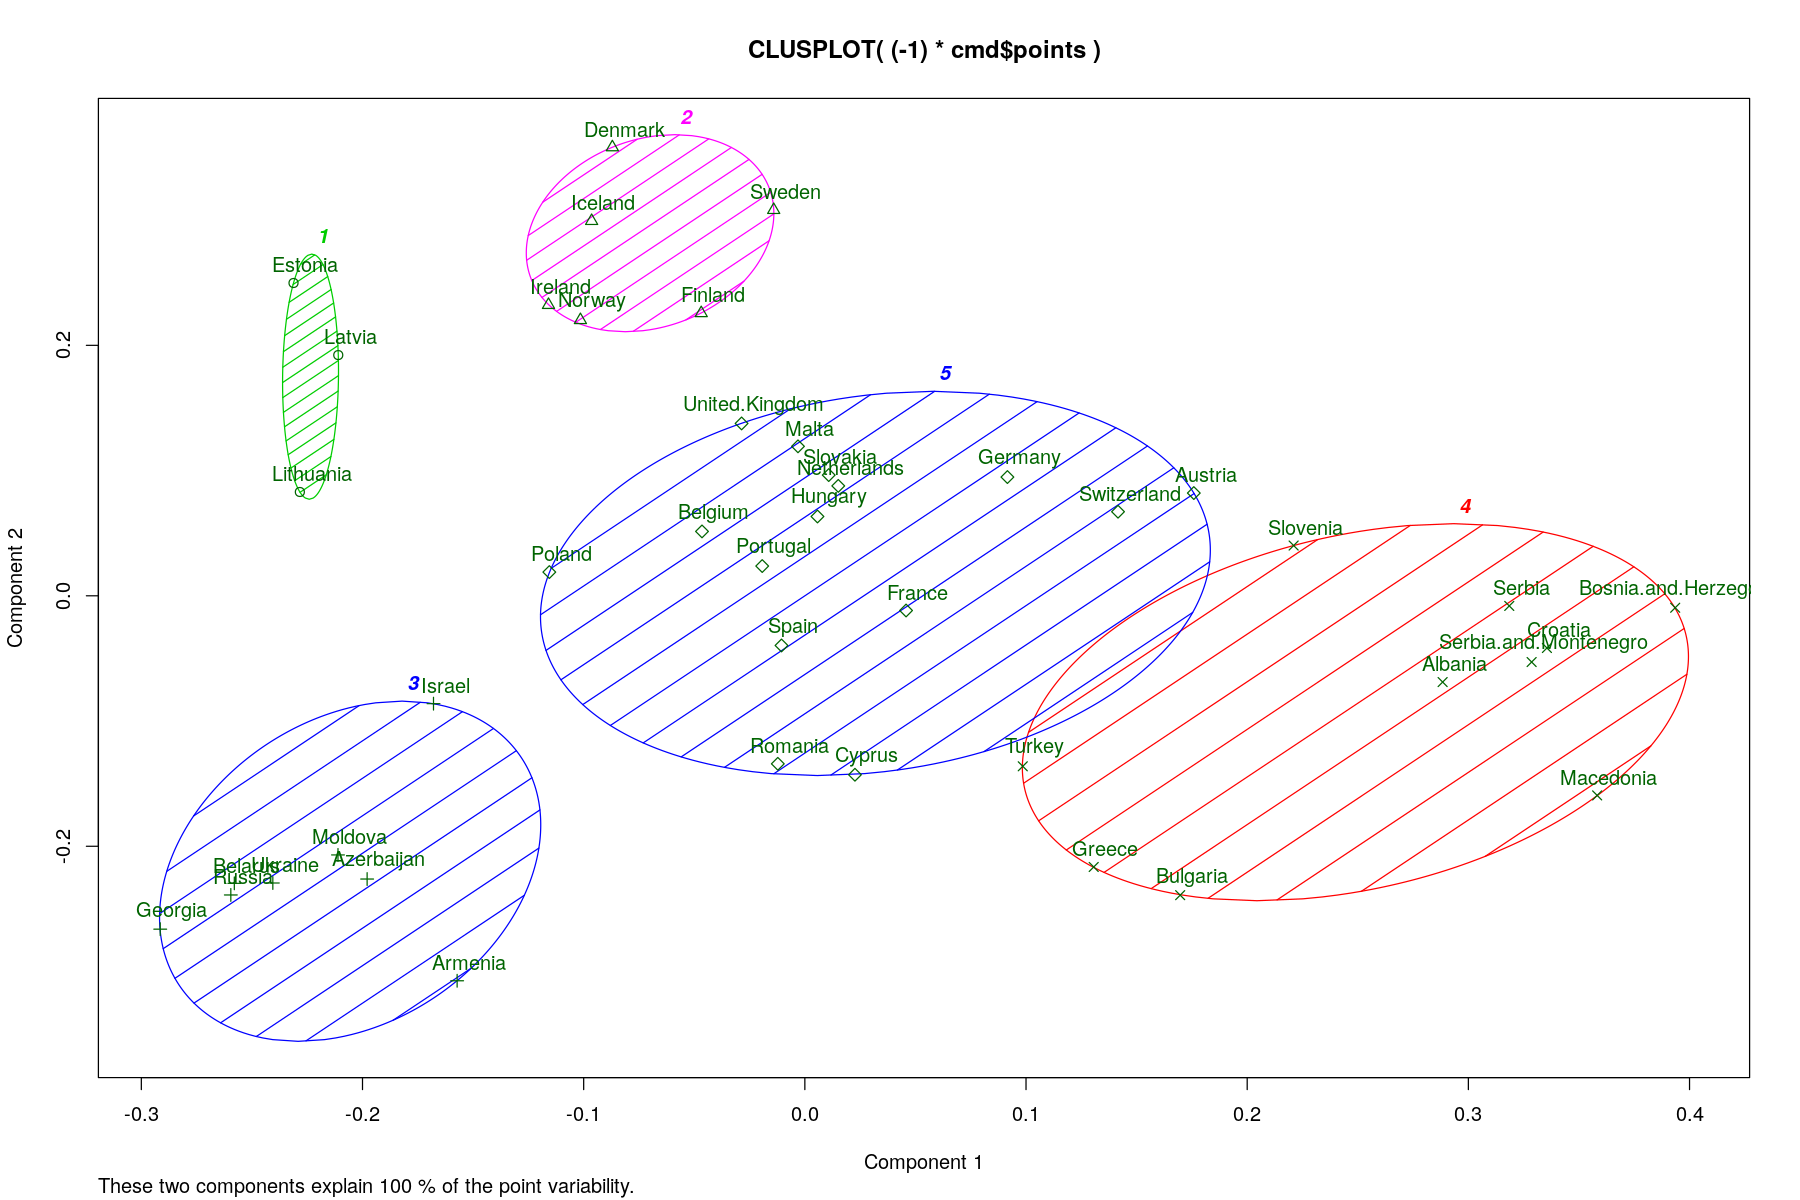

In [57]:
#Hacemos clusters con lo que hemos obtenido
library(cluster)
fit <- kmeans(cmd$points, 5)
clusplot((-1)*cmd$points, fit$cluster, color=TRUE, shade=TRUE,labels=2, lines=0)


Si observamos los clusters podemos deducir que los paises están agrupados prácticamente tal y como lo están geográficamente (aunque no agrupados necesariamente por las regiones definidas en el dataset):

* Están los países de la antigua Yugoslavia junto a Albania (que es limítrofe con algunos de los otros países del cluster). Hemos de decir tanto en este ejercicio como en los anteriores hemos considerado a “Serbia” y “Serbia y Montenegro” como dos entidades diferentes tal y como lo hace el dataset original.

* Tenemos los países del oeste y centro de Europa. Podemos observar además que en algunos casos como Portugal, España, Francia y Bélgica están más agrupados entre sí y los países germanohablantes como Austria, Suiza y Alemania también están agrupados entre sí.

* Rusia junto a países colindantes como Bulgaria y Ukrania, o Azerbayán y Georgia.

* Tenemos los países del este Mediterráneo y países vecinos como Bulgaria o Rumania.

* Los países nórdicos y los bálticos, (además dentro del cluster ambos grupos están separados entre sí). Curiosamente Irlanda también se encuentra entre ellos.


# Conclusiones

Tras observar los resultados obtenidos podemos deducir que lo que más influye en los puntos obtenidos en las canciones depende del factor cultural. La gente, en general de casi todos los países, tiende a votar una canción cuyo país que la representa tiene más afinidad, o sienten más cercanía. Éste factor parece mucho más influyente que otros tales como el tipo de canción o cantante.


# Bibliografía

* [1] http://es.wikipedia.org/wiki/Festival_de_la_Canci%C3%B3n_de_Eurovisi%C3%B3n
* [2] https://docs.google.com/spreadsheet/ccc?key=0AojPWc7pGzlMdHpLei1IR2ZEc21wWllZOU1wRzJVUnc&hl=en#gid=3
* [3] http://courses.statistics.com/software/R/Rtwoway.htm
* [4] http://www.uv.es/mperea/R-Anovas.html

